<a href="https://colab.research.google.com/github/AAskarkyzy/MSW/blob/main/MSW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. Řešení obyčejných diferenciálních rovnic

Lotka=Volterra model popisuje dynamiku populace druhů ve vzájemném vztahu predátor-kořist.


---


dx/dt = αx - βxy

dy/dt = δxy - γy


---
x - je populace kořisti.

y - je populace predátora.

α,β,δ,γ -  jsou parametry ovlivňující růst a úmrtnost populací.


---
Vyřeším diferenciálních rovnic pomocí funkce *solve_ivp* z knihovny SciPy.




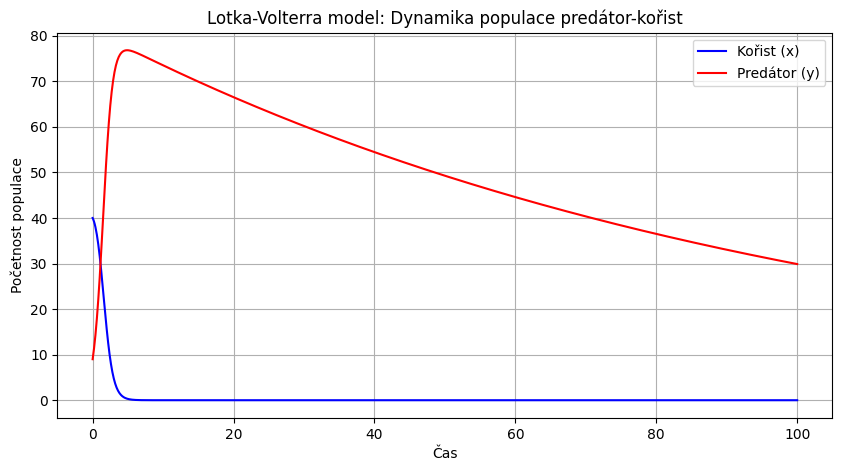

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parametry modelu
alpha = 0.1
beta = 0.02
delta = 0.03
gamma = 0.01

# Diferencialni rovnice pro Lotka-Volterra model
def lotka_volterra(t, xy):
    # rozbaleni hodnot
    x, y = xy
    # vypocet zmeny populace koristi
    dxdt = alpha * x - beta * x * y
    # vypocet zmeny populace predatora
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Pocatecni podminky pro populace koristi a predatora
x0 = 40
y0 = 9
# seznam, obsahuje pocatecni hodnoty x, y
xy0 = [x0, y0]

# casovy interval
t_span = [0, 100]

# reseni diferencialni rovnice
# t_eval je pole casovych bodu, ve kterych chci ziskat reseni
sol = solve_ivp(lotka_volterra, t_span, xy0, t_eval=np.linspace(0, 100, 1000))

# Vykresleni vysledku
plt.figure(figsize=(10, 5))
# sol.t obsahuje casovy body; sol.y[] obsahuje hodnoty koristi;
# 'b' je barva
plt.plot(sol.t, sol.y[0], 'b', label='Kořist (x)')
plt.plot(sol.t, sol.y[1], 'r', label='Predátor (y)')
plt.title('Lotka-Volterra model: Dynamika populace predátor-kořist')
plt.xlabel('Čas')
plt.ylabel('Početnost populace')
plt.legend(loc='best')
plt.grid()
plt.show()


Z grafu je patrné, že s prudkým nárůstem predátorů počet kořisti prudce klesá. A je logické, že při zvýšené míře predátorů se počet kořisti nezvyšuje, což vede ke snížení hladin predátorů.